In [106]:
import pydicom as dicom
import matplotlib.pylab as plt
import cv2
import numpy as np

(512, 512)

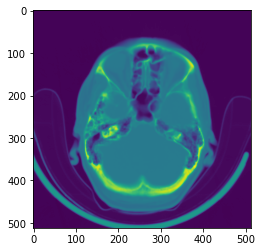

In [107]:
##### Reading a dicom image
img_dcm = 'ID_0002a616e.dcm' ##Specify the path
img_arr = dicom.dcmread(img_dcm)

##### Plotting the image
plt.imshow(img_arr.pixel_array)

##### Shape of the image array
img_arr.pixel_array.shape

In [108]:
def convolution_image(input_image, conv_kernel):
    
    # Kernel dimension
    x_kern = conv_kernel.shape[0]
    y_kern = conv_kernel.shape[1]
    
    # Kernel is flipped both horizontally and vertically
    kernel_lr = np.fliplr(conv_kernel)
    conv_kernel = np.flipud(kernel_lr)
    
    # Add zero padding to the input image
    input_image_pad = np.zeros((input_image.shape[0] + 2, input_image.shape[1] + 2))
    input_image_pad[1:-1, 1:-1] = input_image
    
    # Initialize the output image of convolution
    conv_output = np.zeros_like(input_image)

    # For every pixel of the image, do multiplication with the kernel
    for m in range(input_image.shape[1]):
        for n in range(input_image.shape[0]):
            conv_output[n, m]=(conv_kernel * input_image_pad[n: n + y_kern, m: m + x_kern]).sum()

    return conv_output


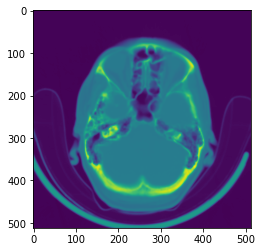

In [109]:
# Q1: Applying linear filter operation.
kernel_mean_lf = np.ones((3,3),np.float32)/9

# Calling the convolution function.
convolved_image = convolution_image(img_arr.pixel_array, kernel_mean_lf)

# display image
plt.imshow(convolved_image)


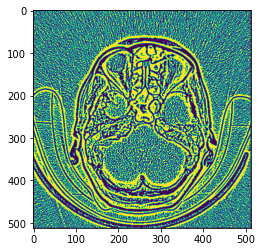

In [110]:
# Q3: Applying edge detection using the provided filter.
kernel_edge_detect = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

# Calling the convolution function.
convolved_image = convolution_image(img_arr.pixel_array, kernel_edge_detect)

# display image
plt.imshow(convolved_image)

In [151]:
### Q2: Template matching for the dentricles

## Finding the cross correlation
def NCrossCorr(big_image, small_temp):
    sumval = np.sum(big_image * small_temp)
    nsqrt = np.sqrt( (np.sum(big_image ** 2))) * np.sqrt(np.sum(small_temp ** 2))
    tot = sumval/nsqrt
    return tot

In [152]:
## Match template function
def match_template(image, template):
    
    # find height and width of the image
    img_h, img_w = image.shape
    temp_h, temp_w = template.shape
    
    (y_max, x_max) = (0, 0)
    Max_coors = 0
    
    NCC_matrix = np.zeros((img_h - temp_h, img_w - temp_w))

    
    for n in range(0, img_h - temp_h):
        for m in range(0, img_w - temp_w):
            NCC_matrix[n, m] = NCrossCorr(image[n : n + temp_h, m : m + temp_w] , template) 
            
            if NCC_matrix[n, m] > Max_coors:
                Max_coors = NCC_matrix[n, m]
                y_max = n
                x_max = m
    
    print(x_max, y_max)
    return (x_max, y_max)

Original shape of the image and the template: 
(256, 242) (256, 242)
92 47


True

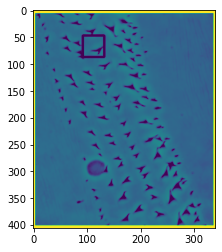

In [153]:
## Template matching w/o by using cross correlation

img_dent_rgb = cv2.imread("Big_dentricle.png", 0)
temp_dent_rgb = cv2.imread("dentricle.png", 0)

print("Original shape of the image and the template: ")
print(temp_dent_rgb.shape, temp_dent_rgb.shape)

left_topval = match_template(img_dent_rgb,temp_dent_rgb)
right_bottomval = left_topval[0] + 40, left_topval[1] + 40

cv2.rectangle(img_dent_rgb, left_topval, right_bottomval, (0,0,255), 3)

plt.imshow(img_dent_rgb)
cv2.imwrite('result_1.png',img_dent_rgb)